In [1]:
import json
import torch as tc
import torch.nn as nn
import torch.optim as optim
from types import SimpleNamespace

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from build_dataset import get_dataloaders
from train import train_model
from evaluate import evaluate_model
from utils import set_seed, load_config
from plots import plot_pca, plot_t_sne

In [3]:
dpi = 400
dataset = 'housing'

config = load_config(path=f'../config_{dataset}.yaml')
cfg = SimpleNamespace(**config)
print(json.dumps(vars(cfg), indent=2))

set_seed(cfg.seed)
device = "cuda" if tc.cuda.is_available() else "cpu"

{
  "path": "../outputs/",
  "seed": 42,
  "normalize": "StandardScaler",
  "split_size": 0.2,
  "batch_size": 128,
  "learning_rate": 0.0001,
  "epochs": 20
}


In [4]:
train, val, test = get_dataloaders(dataset, cfg.normalize, cfg.split_size, cfg.batch_size, cfg.seed)

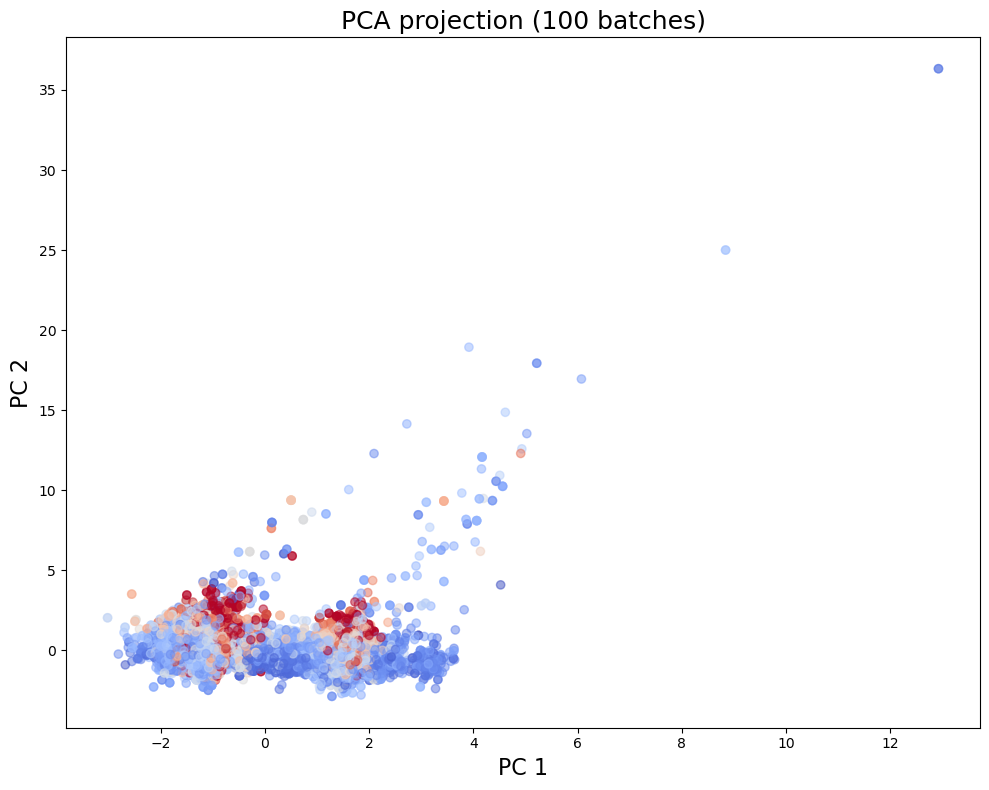

In [5]:
plot_pca(train, cfg.path, dpi, dataset, n_components=2)

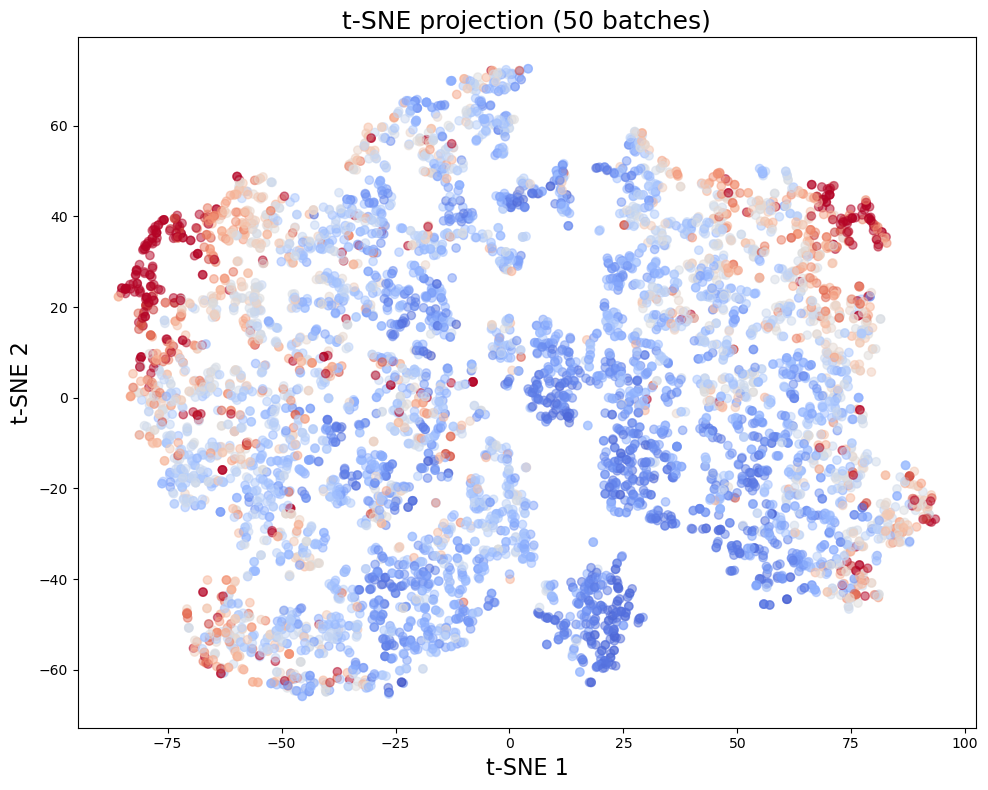

In [6]:
plot_t_sne(train, cfg.path, dpi, dataset, n_components=2, iter_size=50)

In [7]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
        )
    def forward(self, x):
        return self.net(x)

X, y = next(iter(train))
model = MLP(X.shape[1]).to(device)

optimizer = optim.AdamW(model.parameters(), lr=cfg.learning_rate)
loss_fn = nn.MSELoss()

In [8]:
%%time

for e in range(cfg.epochs):
    train_mse, train_r2 = train_model(model, train, optimizer, loss_fn, device)
    val_mse, val_r2 = evaluate_model(model, val, device)
    
    print(f"Epoch {e + 1}:")
    print(f"Train - MSE: {train_mse:.4f}, R2-score: {train_r2:.4f}")
    print(f"Validation - MSE: {val_mse:.4f}, R2-score: {val_r2:.4f}\n")

test_mse, test_r2 = evaluate_model(model, test, device)
print(f"Test - MSE: {test_mse:.4f}, R2-score: {test_r2:.4f}")

Epoch 1:
Train - MSE: 5.2020, R2-score: -2.9235
Validation - MSE: 4.6290, R2-score: -2.5325

Epoch 2:
Train - MSE: 4.0923, R2-score: -2.0866
Validation - MSE: 3.4161, R2-score: -1.6069

Epoch 3:
Train - MSE: 2.9199, R2-score: -1.2023
Validation - MSE: 2.4359, R2-score: -0.8588

Epoch 4:
Train - MSE: 2.1357, R2-score: -0.6108
Validation - MSE: 1.8344, R2-score: -0.3999

Epoch 5:
Train - MSE: 1.6590, R2-score: -0.2513
Validation - MSE: 1.4684, R2-score: -0.1206

Epoch 6:
Train - MSE: 1.3564, R2-score: -0.0231
Validation - MSE: 1.2132, R2-score: 0.0742

Epoch 7:
Train - MSE: 1.1357, R2-score: 0.1434
Validation - MSE: 1.0190, R2-score: 0.2224

Epoch 8:
Train - MSE: 0.9746, R2-score: 0.2649
Validation - MSE: 0.8747, R2-score: 0.3325

Epoch 9:
Train - MSE: 0.8563, R2-score: 0.3542
Validation - MSE: 0.7688, R2-score: 0.4133

Epoch 10:
Train - MSE: 0.7747, R2-score: 0.4157
Validation - MSE: 0.7034, R2-score: 0.4632

Epoch 11:
Train - MSE: 0.7186, R2-score: 0.4580
Validation - MSE: 0.6536, R2-s